Context

This dataset comes from research by Semeion, Research Center of Sciences of Communication. The original aim of the research was to correctly classify the type of surface defects in stainless steel plates, with six types of possible defects (plus "other"). The Input vector was made up of 27 indicators that approximately [describe] the geometric shape of the defect and its outline. According to the research paper, Semeion was commissioned by the Centro Sviluppo Materiali (Italy) for this task and therefore it is not possible to provide details on the nature of the 27 indicators used as Input vectors or the types of the 6 classes of defects.

Dataset can be accessed from here: https://www.kaggle.com/datasets/uciml/faulty-steel-plates

In [ ]:
#import os
#import ray
#ray.init()
#os.environ["MODIN_ENGINE"] = "ray"  # Modin will use Ray
#import modin.pandas as pd

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv(r'faults.csv')

### INITIAL ACTIONS

In [5]:
df.head()

,X_Minimum,X_Maximum,Y_Minimum,Y_Maximum,Pixels_Areas,X_Perimeter,Y_Perimeter,Sum_of_Luminosity,Minimum_of_Luminosity,Maximum_of_Luminosity,...,Orientation_Index,Luminosity_Index,SigmoidOfAreas,Pastry,Z_Scratch,K_Scatch,Stains,Dirtiness,Bumps,Other_Faults
0,42,50,270900,270944,267,17,44,24220,76,108,...,0.8182,-0.2913,0.5822,1,0,0,0,0,0,0
1,645,651,2538079,2538108,108,10,30,11397,84,123,...,0.7931,-0.1756,0.2984,1,0,0,0,0,0,0
2,829,835,1553913,1553931,71,8,19,7972,99,125,...,0.6667,-0.1228,0.2150,1,0,0,0,0,0,0
3,853,860,369370,369415,176,13,45,18996,99,126,...,0.8444,-0.1568,0.5212,1,0,0,0,0,0,0
4,1289,1306,498078,498335,2409,60,260,246930,37,126,...,0.9338,-0.1992,1.0000,1,0,0,0,0,0,0


In [3]:
df.describe()

,X_Minimum,X_Maximum,Y_Minimum,Y_Maximum,Pixels_Areas,X_Perimeter,Y_Perimeter,Sum_of_Luminosity,Minimum_of_Luminosity,Maximum_of_Luminosity,...,Orientation_Index,Luminosity_Index,SigmoidOfAreas,Pastry,Z_Scratch,K_Scatch,Stains,Dirtiness,Bumps,Other_Faults
count,1941.000000,1941.000000,1.941000e+03,1.941000e+03,1941.000000,1941.000000,1941.000000,1.941000e+03,1941.000000,1941.000000,...,1941.000000,1941.000000,1941.000000,1941.000000,1941.000000,1941.000000,1941.000000,1941.000000,1941.000000,1941.000000
mean,571.136012,617.964451,1.650685e+06,1.650739e+06,1893.878413,111.855229,82.965997,2.063121e+05,84.548686,130.193715,...,0.083288,-0.131305,0.585420,0.081401,0.097888,0.201443,0.037094,0.028336,0.207110,0.346728
std,520.690671,497.627410,1.774578e+06,1.774590e+06,5168.459560,301.209187,426.482879,5.122936e+05,32.134276,18.690992,...,0.500868,0.148767,0.339452,0.273521,0.297239,0.401181,0.189042,0.165973,0.405339,0.476051
min,0.000000,4.000000,6.712000e+03,6.724000e+03,2.000000,2.000000,1.000000,2.500000e+02,0.000000,37.000000,...,-0.991000,-0.998900,0.119000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,51.000000,192.000000,4.712530e+05,4.712810e+05,84.000000,15.000000,13.000000,9.522000e+03,63.000000,124.000000,...,-0.333300,-0.195000,0.248200,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,435.000000,467.000000,1.204128e+06,1.204136e+06,174.000000,26.000000,25.000000,1.920200e+04,90.000000,127.000000,...,0.095200,-0.133000,0.506300,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1053.000000,1072.000000,2.183073e+06,2.183084e+06,822.000000,84.000000,83.000000,8.301100e+04,106.000000,140.000000,...,0.511600,-0.066600,0.999800,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1705.000000,1713.000000,1.298766e+07,1.298769e+07,152655.000000,10449.000000,18152.000000,1.159141e+07,203.000000,253.000000,...,0.991700,0.642100,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [12]:
#check duplicate values
df[['X_Maximum', 'X_Minimum']].value_counts()

X_Maximum  X_Minimum
212        39           11
218        41           10
214        39           10
212        41            9
216        41            9
                        ..
312        298           1
311        303           1
310        296           1
309        301           1
1713       1705          1
Length: 1693, dtype: int64

In [13]:
df.query("X_Maximum == 212 and X_Minimum == 39")

,X_Minimum,X_Maximum,Y_Minimum,Y_Maximum,Pixels_Areas,X_Perimeter,Y_Perimeter,Sum_of_Luminosity,Minimum_of_Luminosity,Maximum_of_Luminosity,...,Orientation_Index,Luminosity_Index,SigmoidOfAreas,Pastry,Z_Scratch,K_Scatch,Stains,Dirtiness,Bumps,Other_Faults
415,39,212,862475,862693,17357,794,495,2034432,27,142,...,0.2064,-0.0843,1.0,0,0,1,0,0,0,0
434,39,212,1185602,1185752,13387,763,425,1546189,29,141,...,-0.1329,-0.0977,1.0,0,0,1,0,0,0,0
445,39,212,1299230,1299402,11875,657,387,1375431,32,143,...,-0.0058,-0.0951,1.0,0,0,1,0,0,0,0
620,39,212,1715280,1715348,6596,316,170,685447,44,124,...,-0.6069,-0.1881,1.0,0,0,1,0,0,0,0
628,39,212,1814642,1814708,6525,278,134,674367,38,124,...,-0.6185,-0.1926,1.0,0,0,1,0,0,0,0
648,39,212,2070134,2070204,6399,287,132,666455,41,126,...,-0.5954,-0.1863,1.0,0,0,1,0,0,0,0
659,39,212,2233368,2233436,6310,290,151,658162,41,125,...,-0.6069,-0.1851,1.0,0,0,1,0,0,0,0
660,39,212,2244009,2244082,6827,276,141,711671,40,124,...,-0.5780,-0.1856,1.0,0,0,1,0,0,0,0
681,39,212,2730163,2730230,6108,299,149,635284,40,125,...,-0.6127,-0.1874,1.0,0,0,1,0,0,0,0
685,39,212,2776296,2776362,6172,263,143,648030,39,126,...,-0.6185,-0.1797,1.0,0,0,1,0,0,0,0


In [4]:
df.drop_duplicates()
df.shape
#no row-wise duplicates

(1941, 34)

In [3]:
df.nunique()

X_Minimum                 962
X_Maximum                 994
Y_Minimum                1939
Y_Maximum                1940
Pixels_Areas              920
X_Perimeter               399
Y_Perimeter               317
Sum_of_Luminosity        1909
Minimum_of_Luminosity     161
Maximum_of_Luminosity     100
Length_of_Conveyer         84
TypeOfSteel_A300            2
TypeOfSteel_A400            2
Steel_Plate_Thickness      24
Edges_Index              1387
Empty_Index              1338
Square_Index              770
Outside_X_Index           454
Edges_X_Index             818
Edges_Y_Index             648
Outside_Global_Index        3
LogOfAreas                914
Log_X_Index               183
Log_Y_Index               217
Orientation_Index         918
Luminosity_Index         1522
SigmoidOfAreas            388
Pastry                      2
Z_Scratch                   2
K_Scatch                    2
Stains                      2
Dirtiness                   2
Bumps                       2
Other_Faul

In [5]:
df['Outside_Global_Index'].value_counts()

1.0    1072
0.0     778
0.5      91
Name: Outside_Global_Index, dtype: int64

### EDA

In [3]:
df.columns

Index(['X_Minimum', 'X_Maximum', 'Y_Minimum', 'Y_Maximum', 'Pixels_Areas',
       'X_Perimeter', 'Y_Perimeter', 'Sum_of_Luminosity',
       'Minimum_of_Luminosity', 'Maximum_of_Luminosity', 'Length_of_Conveyer',
       'TypeOfSteel_A300', 'TypeOfSteel_A400', 'Steel_Plate_Thickness',
       'Edges_Index', 'Empty_Index', 'Square_Index', 'Outside_X_Index',
       'Edges_X_Index', 'Edges_Y_Index', 'Outside_Global_Index', 'LogOfAreas',
       'Log_X_Index', 'Log_Y_Index', 'Orientation_Index', 'Luminosity_Index',
       'SigmoidOfAreas', 'Pastry', 'Z_Scratch', 'K_Scatch', 'Stains',
       'Dirtiness', 'Bumps', 'Other_Faults'],
      dtype='object')

In [3]:
label_list=df.columns.values[-7:]
number_of_features=df.shape[1]-len(label_list)
features_list=[]
for i, column in enumerate(df.columns.values):
    if column not in label_list:
       features_list.append(column)

In [7]:
label_list

array(['Pastry', 'Z_Scratch', 'K_Scatch', 'Stains', 'Dirtiness', 'Bumps',
       'Other_Faults'], dtype=object)

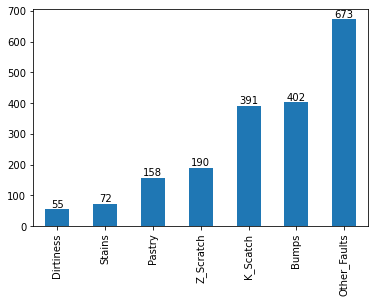

In [8]:
#class distribution
a=df[label_list].sum().sort_values().plot.bar()
plt.bar_label(a.containers[0])
plt.show()

In [4]:
df.isnull().any().any()

False

In [8]:
df.dtypes

X_Minimum                  int64
X_Maximum                  int64
Y_Minimum                  int64
Y_Maximum                  int64
Pixels_Areas               int64
X_Perimeter                int64
Y_Perimeter                int64
Sum_of_Luminosity          int64
Minimum_of_Luminosity      int64
Maximum_of_Luminosity      int64
Length_of_Conveyer         int64
TypeOfSteel_A300           int64
TypeOfSteel_A400           int64
Steel_Plate_Thickness      int64
Edges_Index              float64
Empty_Index              float64
Square_Index             float64
Outside_X_Index          float64
Edges_X_Index            float64
Edges_Y_Index            float64
Outside_Global_Index     float64
LogOfAreas               float64
Log_X_Index              float64
Log_Y_Index              float64
Orientation_Index        float64
Luminosity_Index         float64
SigmoidOfAreas           float64
Pastry                     int64
Z_Scratch                  int64
K_Scatch                   int64
Stains    

In [9]:
features_list

['X_Minimum',
 'X_Maximum',
 'Y_Minimum',
 'Y_Maximum',
 'Pixels_Areas',
 'X_Perimeter',
 'Y_Perimeter',
 'Sum_of_Luminosity',
 'Minimum_of_Luminosity',
 'Maximum_of_Luminosity',
 'Length_of_Conveyer',
 'TypeOfSteel_A300',
 'TypeOfSteel_A400',
 'Steel_Plate_Thickness',
 'Edges_Index',
 'Empty_Index',
 'Square_Index',
 'Outside_X_Index',
 'Edges_X_Index',
 'Edges_Y_Index',
 'Outside_Global_Index',
 'LogOfAreas',
 'Log_X_Index',
 'Log_Y_Index',
 'Orientation_Index',
 'Luminosity_Index',
 'SigmoidOfAreas']

In [4]:
categorical_features = [] + label_list.tolist()
for feature in features_list:
    for char in feature:
        if char.isdigit():
            if feature not in categorical_features:
                categorical_features.append(feature)
categorical_features

['Pastry',
 'Z_Scratch',
 'K_Scatch',
 'Stains',
 'Dirtiness',
 'Bumps',
 'Other_Faults',
 'TypeOfSteel_A300',
 'TypeOfSteel_A400']

In [5]:
numerical_features = []
for feature in features_list:
    if feature not in categorical_features:
        numerical_features.append(feature)
numerical_features

['X_Minimum',
 'X_Maximum',
 'Y_Minimum',
 'Y_Maximum',
 'Pixels_Areas',
 'X_Perimeter',
 'Y_Perimeter',
 'Sum_of_Luminosity',
 'Minimum_of_Luminosity',
 'Maximum_of_Luminosity',
 'Length_of_Conveyer',
 'Steel_Plate_Thickness',
 'Edges_Index',
 'Empty_Index',
 'Square_Index',
 'Outside_X_Index',
 'Edges_X_Index',
 'Edges_Y_Index',
 'Outside_Global_Index',
 'LogOfAreas',
 'Log_X_Index',
 'Log_Y_Index',
 'Orientation_Index',
 'Luminosity_Index',
 'SigmoidOfAreas']

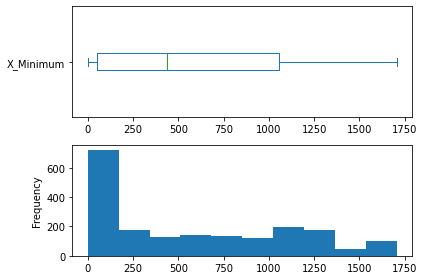

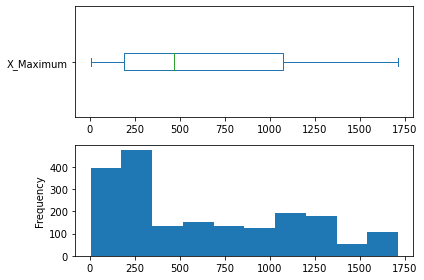

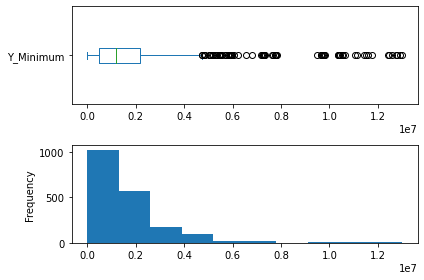

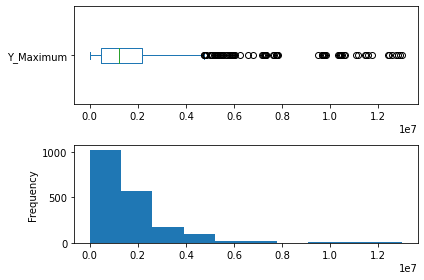

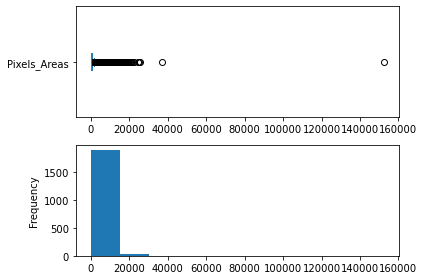

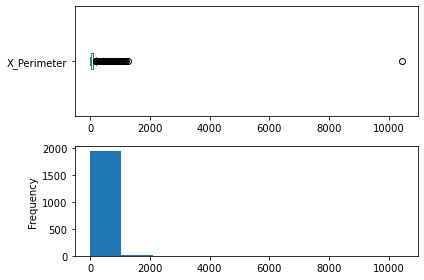

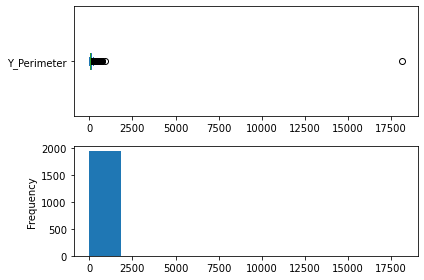

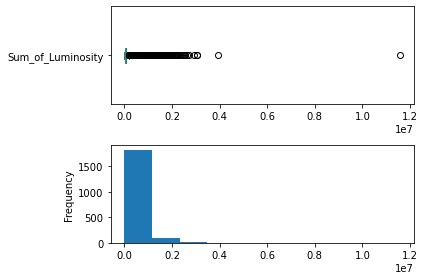

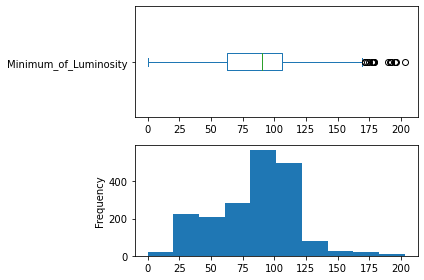

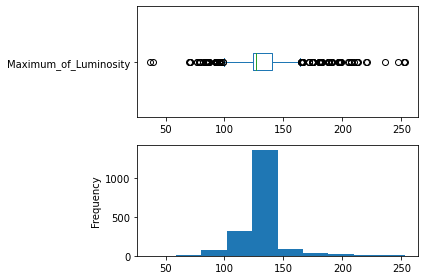

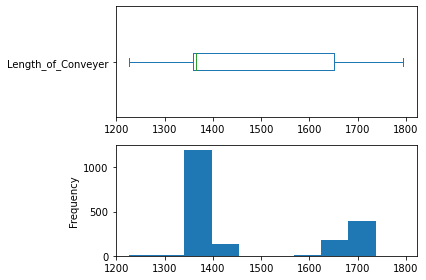

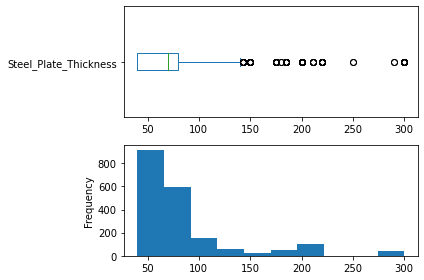

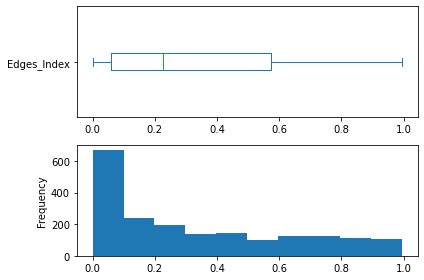

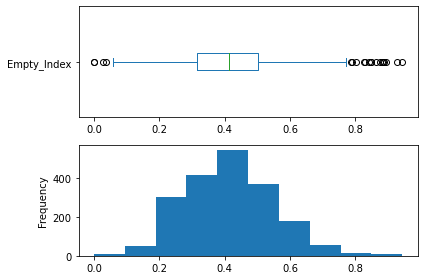

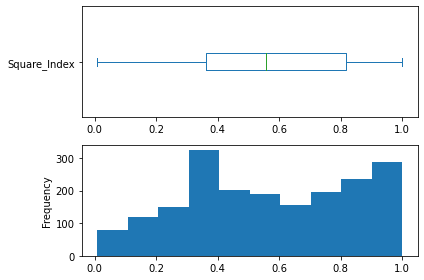

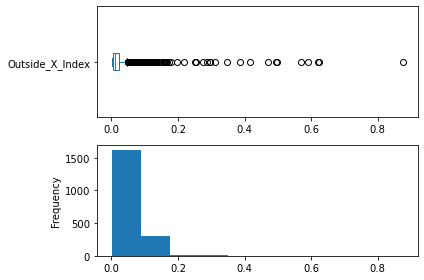

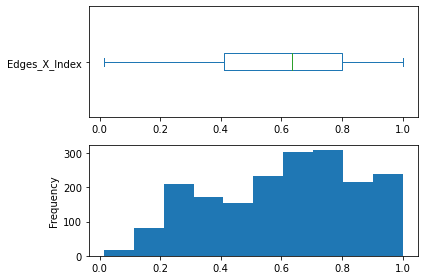

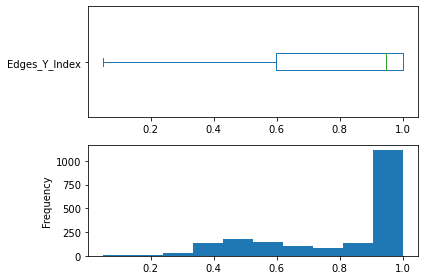

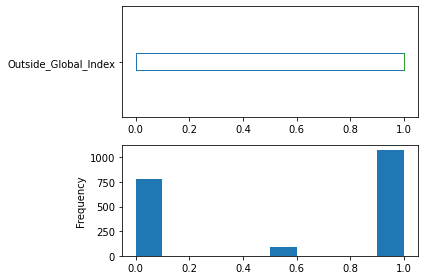

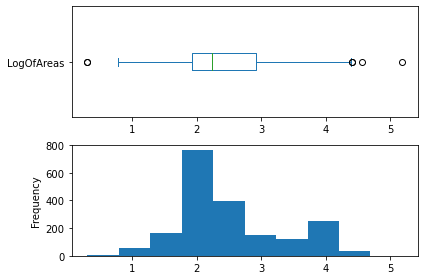

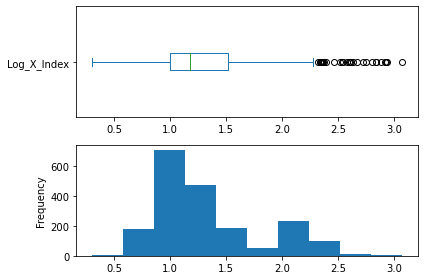

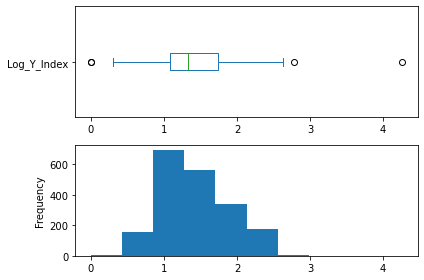

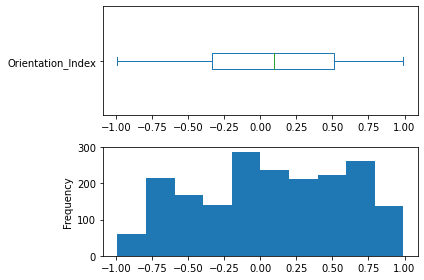

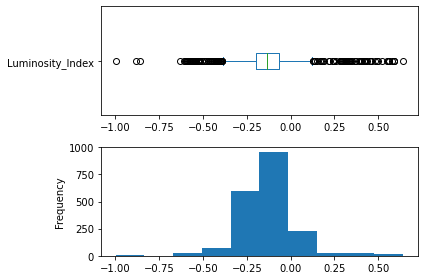

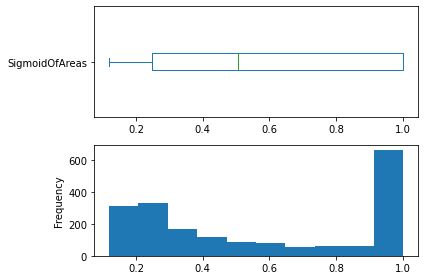

In [12]:
for feature in numerical_features:
    plt.subplot(2,1,1)
    df[feature].plot.box(vert=False)
    plt.subplot(2,1,2)
    df[feature].plot.hist()
    plt.tight_layout()
    plt.show()

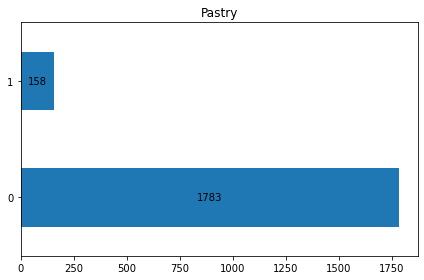

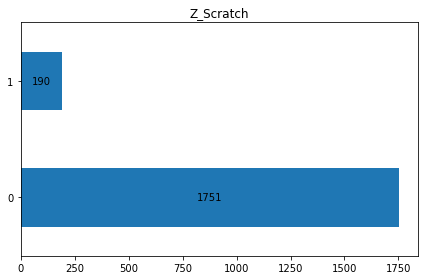

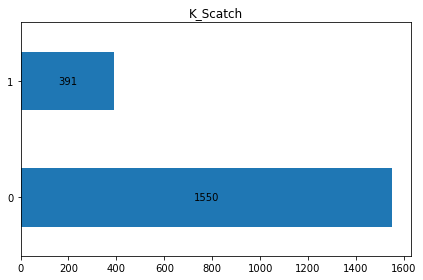

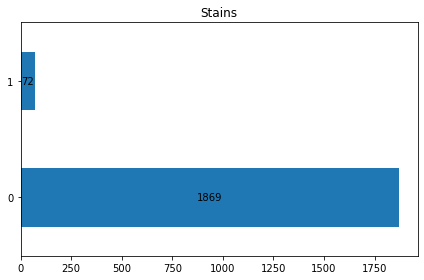

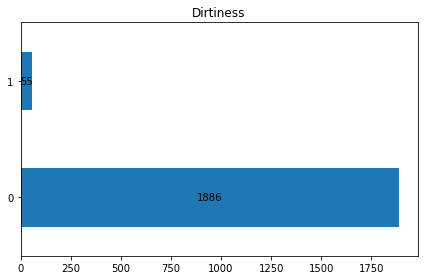

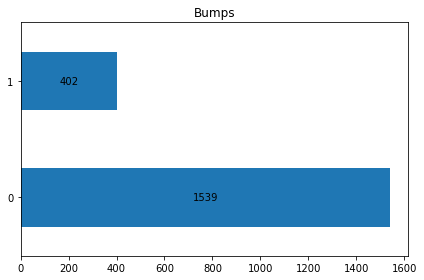

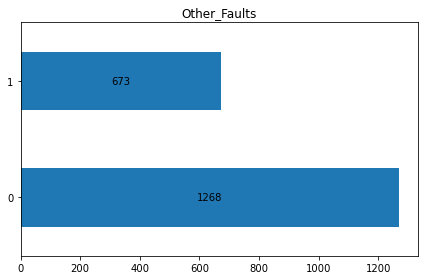

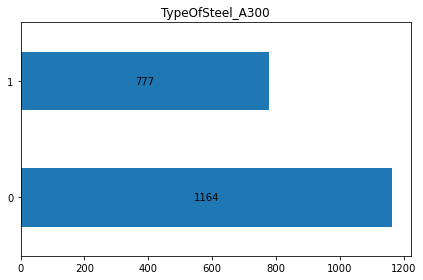

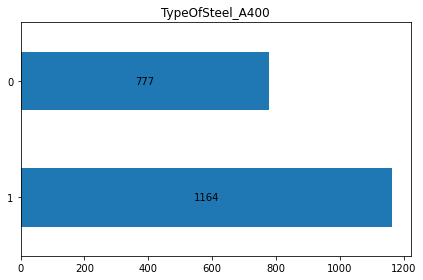

In [136]:
for feature in categorical_features:
    ax = df[feature].value_counts().plot.barh(stacked = True)
    plt.title(feature)
    plt.tight_layout()
    plt.bar_label(ax.containers[0], label_type = 'center')
    plt.show()

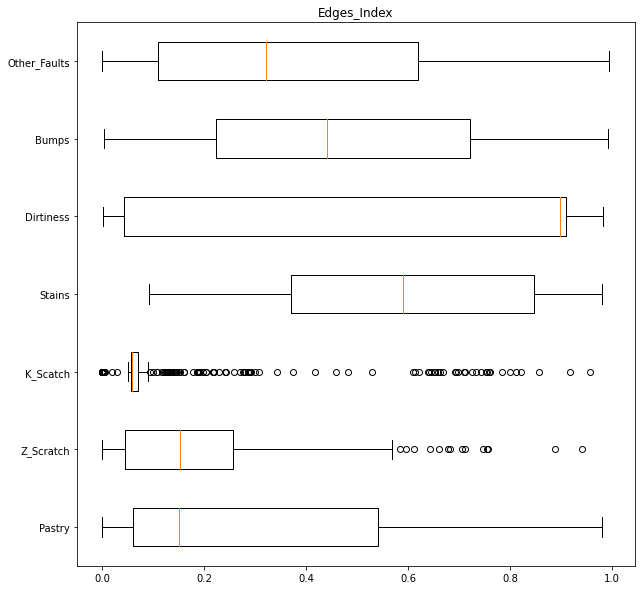

In [14]:
box_plot = pd.Series('', index = label_list)

for i in label_list:
    BM = df[i] == 1
    box_plot[i] = df[BM]['Edges_Index']

plt.figure(figsize=(10, 10))
plt.boxplot(box_plot,vert=False)
plt.title('Edges_Index')
plt.yticks(np.arange(1,8),label_list)
plt.show()abc

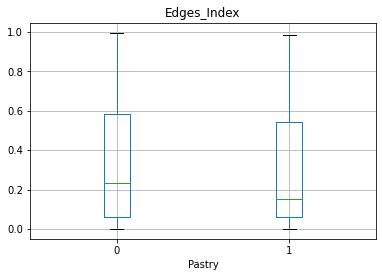

In [24]:
df.boxplot(column = 'Edges_Index', by = 'Pastry')
plt.suptitle("")
plt.show()

In [6]:
label_str = []
for i in label_list.tolist():
    label_str.append(str(i))
label_str.reverse()
label_str

['Other_Faults',
 'Bumps',
 'Dirtiness',
 'Stains',
 'K_Scatch',
 'Z_Scratch',
 'Pastry']

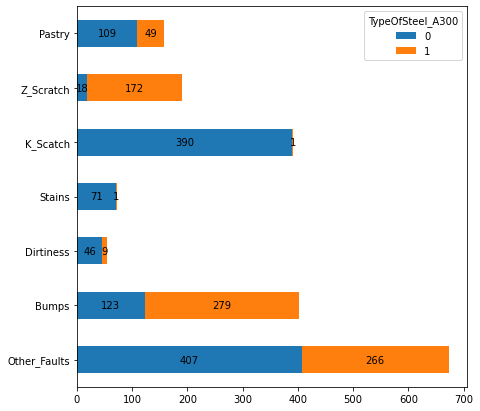

In [11]:
b=df.groupby(label_list.tolist() + ['TypeOfSteel_A300']).size().unstack().plot.barh(stacked=True, figsize = (7,7))
plt.bar_label(b.containers[0], label_type = 'center')
plt.bar_label(b.containers[1], label_type = 'center')
plt.ylabel(None)
y_labels = label_list.tolist()[::-1]
plt.yticks(np.arange(0,7), y_labels)
plt.show()


In [163]:
#can be used to read the numbers more clearly in the above figure
contingency_tbl = pd.crosstab(df[label_list.tolist()[0]],df['TypeOfSteel_A300'])
contingency_tbl

TypeOfSteel_A300,0,1
Pastry,,
0,1055,728
1,109,49


In [ ]:
matplotlib.interactive(False)
sns_plot = sns.pairplot(df[numerical_features], diag_kind = 'kde')
sns_plot.savefig("pairplot.png")

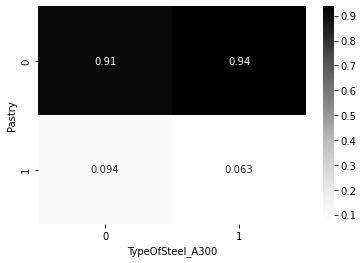

In [164]:
probablity_tbl = contingency_tbl/ contingency_tbl.sum()
sns.heatmap(probablity_tbl, annot=True, center=0.5 ,cmap="Greys")
plt.show()

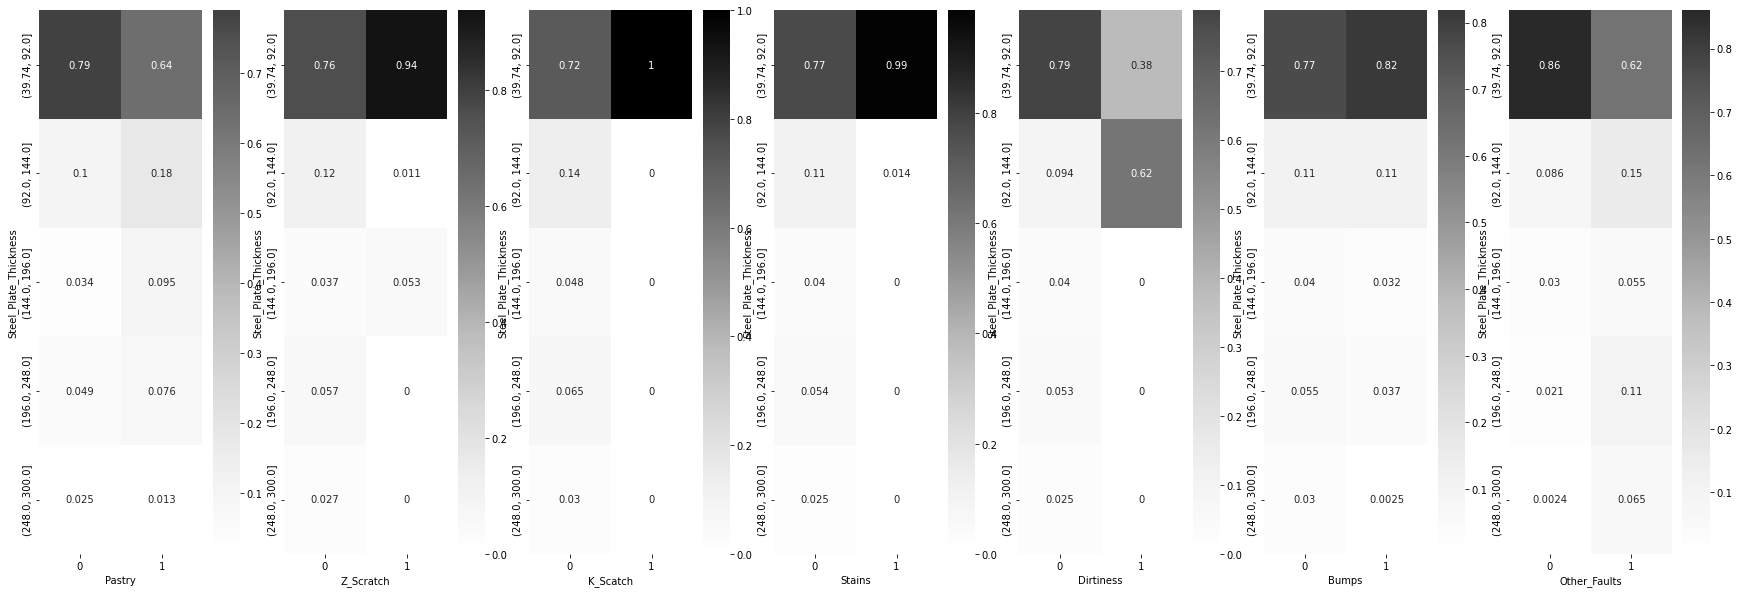

In [46]:
plt.subplots(1,7, figsize = (30,10), constrained_layout = False)
for i, label in enumerate(label_list.tolist()):
    plt.subplot(1,7,i+1)
    discretized = pd.cut(df['Steel_Plate_Thickness'], bins = 5)
    contingency_tbl = pd.crosstab(discretized,df[label])
    probablity_tbl = contingency_tbl/ contingency_tbl.sum()
    sns.heatmap(probablity_tbl, annot=True, center=0.5 ,cmap="Greys")
plt.show()
#majority of the faults occur in thicknesses between 39.74-92.0

In [18]:
discretized = pd.cut(df['Steel_Plate_Thickness'], bins = 5)

In [77]:
pd.crosstab(discretized, df['Pastry'])
#can be used to obtain numeric values for the heatmap above if desired

Pastry,0,1
Steel_Plate_Thickness,,
"(39.74, 92.0]",1407,101
"(92.0, 144.0]",183,28
"(144.0, 196.0]",60,15
"(196.0, 248.0]",88,12
"(248.0, 300.0]",45,2


In [64]:
#Is it because majority of the data is in between these thickness values? Yes, as shown below.

BM = (df['Steel_Plate_Thickness'] > 39.74) & (df['Steel_Plate_Thickness'] < 92.0)
1 - (df.shape[0] - df[BM].shape[0]) / df.shape[0] #78% data belongs to thicknesses between 39.74-92.0

0.7769191138588356

In [91]:
#Above can also be verified as shown below. 1508 data objects (rows) out of 1941 belong to thicknesses between 39.74 and 92
discretized.describe()

count              1941
unique                5
top       (39.74, 92.0]
freq               1508
Name: Steel_Plate_Thickness, dtype: object

In [93]:
from scipy.stats import chi2_contingency
table = pd.crosstab(df['Pastry'], discretized)
chi2, p, dof, expected = chi2_contingency(table.values)
print('Chi-square %0.2f p-value %0.3f' % (chi2, p))

Chi-square 28.67 p-value 0.000


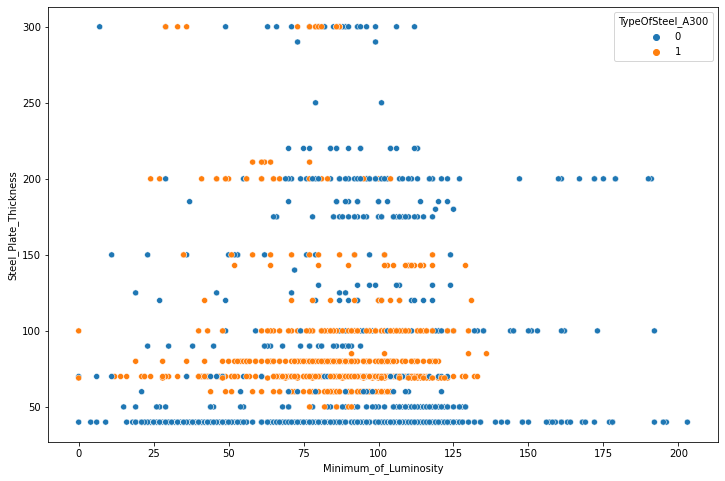

In [72]:
fig = plt.gcf()
fig.set_size_inches(12, 8)

sns.scatterplot(data = df, y = 'Steel_Plate_Thickness', x = 'Minimum_of_Luminosity', hue = 'TypeOfSteel_A300')
plt.show()

In [ ]:
from scipy.stats import chi2_contingency
table = pd.crosstab(df['Pastry'],)

### OUTLIER DETECTION

#### UNIVARIATE OUTLIER ELIMINATION

In [7]:
from scipy.stats.mstats import winsorize
df_no_outliers = df.copy()
for feature in df[numerical_features]:
    winsorized = winsorize(df[feature], limits = (0.025, 0.025))
    df_no_outliers.loc[df_no_outliers.index, feature] = winsorized

#### MULTIVARIATE OUTLIER ELIMINATION

In [8]:
wdf = (df_no_outliers - df_no_outliers.min())/(df_no_outliers.max()-df_no_outliers.min())

In [9]:
from sklearn.ensemble import IsolationForest
auto_detection = IsolationForest(max_samples = 50, contamination = 0.025, random_state = 0, n_jobs = -1)
#assumed 2.5% of the cases are to be considered outliers because of data quality.
auto_detection.fit(wdf)
evaluation = auto_detection.predict(wdf)
suspected_outliers = df_no_outliers[evaluation == -1]

D:\JupyterLab\resources\jlab_server\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


In [14]:
df_no_outliers.drop(index = suspected_outliers.index.tolist(), inplace = True)
df_no_outliers.shape

(1892, 34)

In [12]:
a = (df_no_outliers - df_no_outliers.min())/(df_no_outliers.max()-df_no_outliers.min())
a.to_csv('E:\ML\ML Practice\steel\steel_dataset.csv')

### FEATURE SELECTION and TRANSFORMATION

In [77]:
(df_no_outliers.corr(method = 'spearman') - df_no_outliers.corr()) > 0.2
#it might be better to use spearman correlation for the feature pairs with True elements for EDA purposes.

,X_Minimum,X_Maximum,Y_Minimum,Y_Maximum,Pixels_Areas,X_Perimeter,Y_Perimeter,Sum_of_Luminosity,Minimum_of_Luminosity,Maximum_of_Luminosity,...,Orientation_Index,Luminosity_Index,SigmoidOfAreas,Pastry,Z_Scratch,K_Scatch,Stains,Dirtiness,Bumps,Other_Faults
X_Minimum,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
X_Maximum,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
Y_Minimum,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
Y_Maximum,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
Pixels_Areas,False,False,False,False,False,False,False,False,False,False,...,True,False,True,False,False,False,False,False,False,False
X_Perimeter,False,False,False,False,False,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False
Y_Perimeter,False,False,False,False,False,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False
Sum_of_Luminosity,False,False,False,False,False,False,False,False,False,False,...,True,False,True,False,False,False,False,False,False,False
Minimum_of_Luminosity,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
Maximum_of_Luminosity,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [ ]:
corr_table = df[numerical_features].corr()
BM = (corr_table > 0.7) | (corr_table < -0.7)
corr_table[BM]

,X_Minimum,X_Maximum,Y_Minimum,Y_Maximum,Pixels_Areas,X_Perimeter,Y_Perimeter,Sum_of_Luminosity,Minimum_of_Luminosity,Maximum_of_Luminosity,...,Outside_X_Index,Edges_X_Index,Edges_Y_Index,Outside_Global_Index,LogOfAreas,Log_X_Index,Log_Y_Index,Orientation_Index,Luminosity_Index,SigmoidOfAreas
X_Minimum,1.000000,0.988314,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
X_Maximum,0.988314,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Y_Minimum,NaN,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Y_Maximum,NaN,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Pixels_Areas,NaN,NaN,NaN,NaN,1.000000,0.966644,0.827199,0.978952,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
X_Perimeter,NaN,NaN,NaN,NaN,0.966644,1.000000,0.912436,0.912956,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Y_Perimeter,NaN,NaN,NaN,NaN,0.827199,0.912436,1.000000,0.704876,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Sum_of_Luminosity,NaN,NaN,NaN,NaN,0.978952,0.912956,0.704876,1.000000,NaN,NaN,...,NaN,NaN,NaN,NaN,0.712128,NaN,NaN,NaN,NaN,NaN
Minimum_of_Luminosity,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Maximum_of_Luminosity,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.00000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.87016,NaN


In [ ]:
#number of feature pairs with correlations greater than 0.7 
a = (corr_table[BM].count().sum() - corr_table.shape[1]) / 2
a

20.0

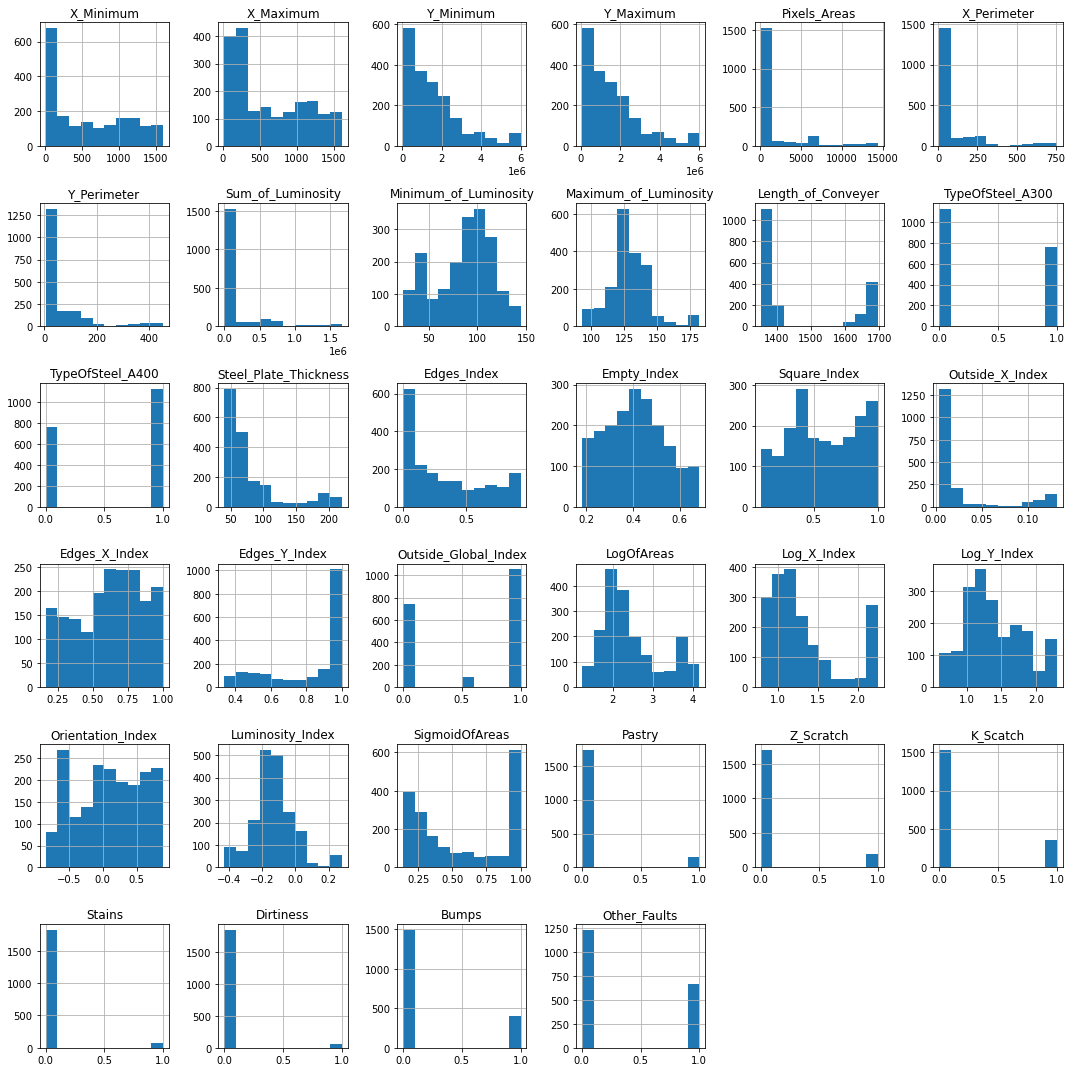

In [70]:
df_no_outliers.hist(column = df.columns.tolist(), figsize = (15,15))
plt.tight_layout()
#plt.show()
plt.savefig('raw data')

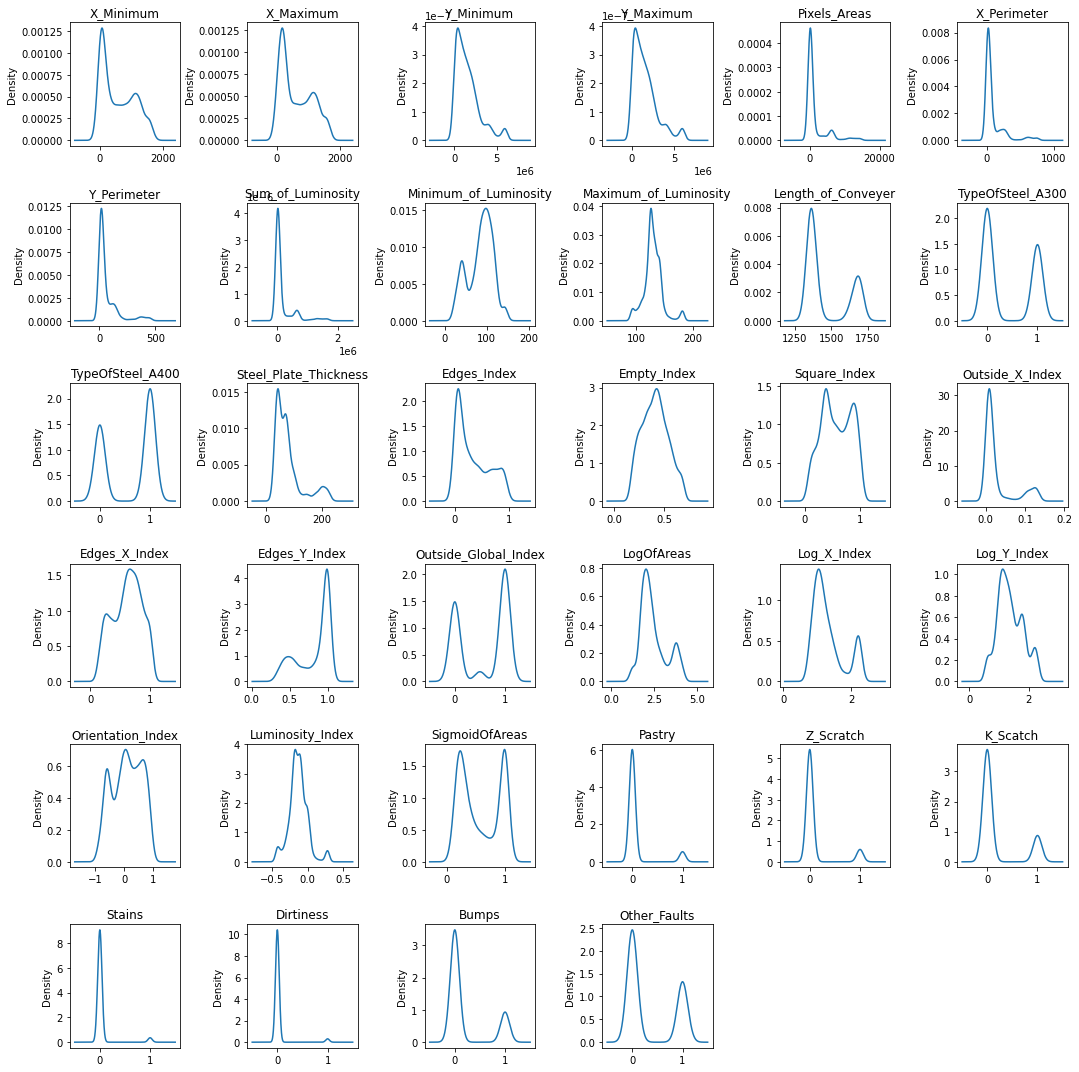

In [19]:
for i, feature in enumerate(df_no_outliers.columns.tolist()):
    plt.subplot(6, 6, i+1)
    df_no_outliers[feature].plot.kde(figsize = (15,15))
    plt.title(feature)
plt.tight_layout()
plt.show()

In [16]:
from sklearn.model_selection import cross_val_score, train_test_split, RepeatedStratifiedKFold, RandomizedSearchCV
from sklearn.feature_selection import RFECV
from sklearn.linear_model import LogisticRegression, Perceptron
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import ExtraTreeClassifier
#from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PowerTransformer, StandardScaler, QuantileTransformer, MinMaxScaler
from sklearn.compose import ColumnTransformer
from sklearn.decomposition import KernelPCA

C:\Users\ANL\AppData\Roaming\jupyterlab-desktop\jlab_server\lib\site-packages\xgboost\compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


In [17]:
estimators = [RandomForestClassifier()] #could use gradient boosting classifier, decision tree, etc additionally but it takes too much time, so omit them.
estimator_names = ['RF']
initial_models = [SVC(kernel = 'rbf'), ExtraTreeClassifier(), DecisionTreeClassifier(), LogisticRegression(n_jobs = -2), KNeighborsClassifier(n_jobs = -2), RandomForestClassifier(n_jobs = -2), GradientBoostingClassifier(), XGBClassifier(use_label_encoder = False, n_jobs = -2)]
initial_models_names = ['SVM', 'ET', 'DT', 'LR', 'KNN', 'RF', 'SGB', 'XGB']

set1 = df_no_outliers.columns
set2 = df_no_outliers[numerical_features].columns
features_to_transform = list(set1.intersection(set2))

loc_of_feat_to_trans = [] #location of features to transform
mask = np.isin(np.array(set1), np.array(features_to_transform))
for i, y in enumerate(mask):
    if y == True:
        loc_of_feat_to_trans.append(i)


X = df_no_outliers[features_list].values
y = df_no_outliers[label_list].values

X_train, X_validation, y_train, y_validation = train_test_split(X, y, random_state = 1, test_size = 0.2, shuffle = True, stratify = y)
# CORRECTION: SHOULD'VE USED TRAIN, TEST, AND VALIDATION SPLIT AS I WAS GOING TO DO HYPERPARAMETER TUNING.

transformer = PowerTransformer(method = 'yeo-johnson', standardize = True)

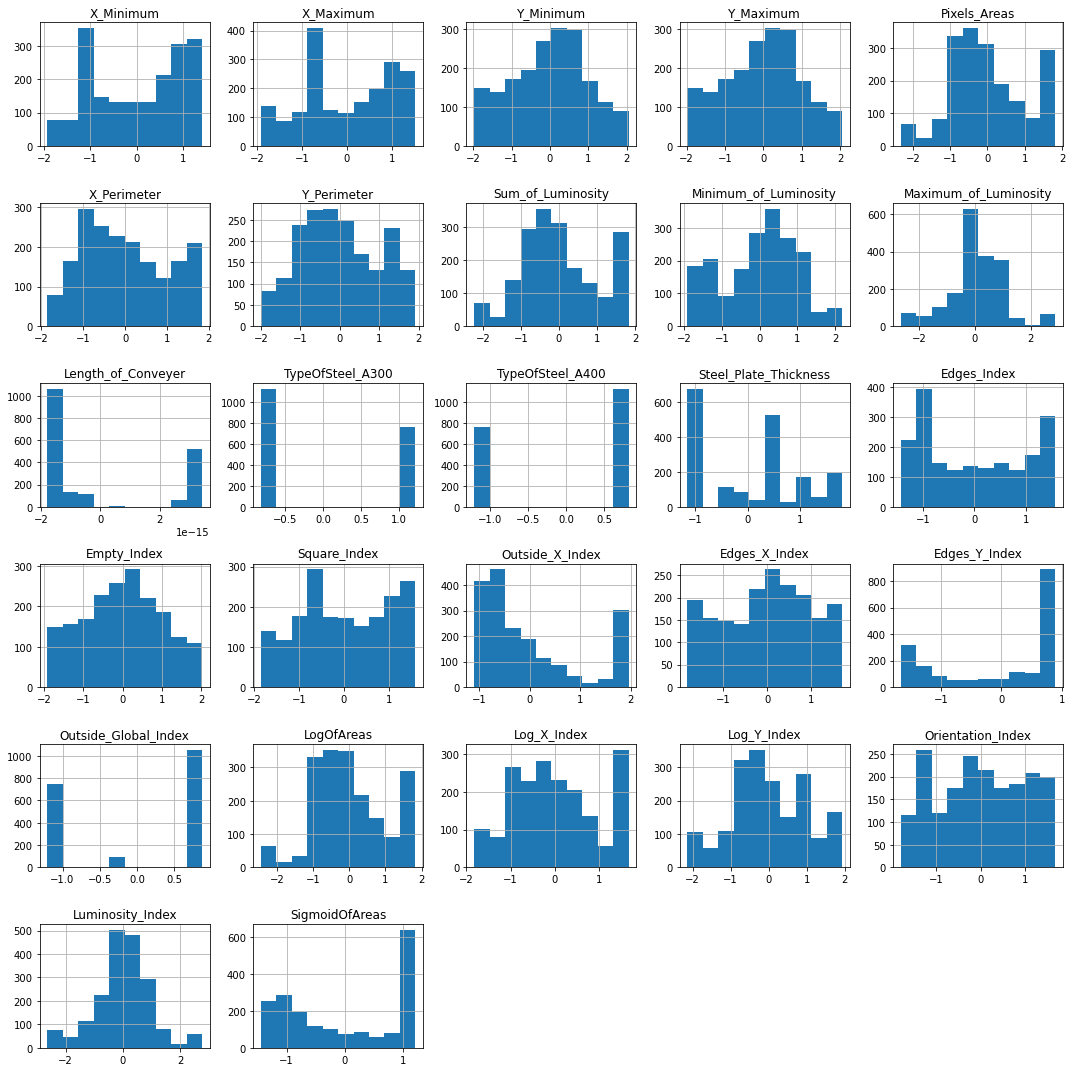

In [28]:
#check the distributions of the transformed data
transformed_data = transformer.fit_transform(X)
wdf_transformed = pd.DataFrame(transformed_data, columns = df[features_list].columns.tolist())

wdf_transformed.hist(column = wdf_transformed.columns.tolist(), figsize = (15,15))
plt.tight_layout()
plt.show()
#plt.savefig('transformed data')

In [29]:
#preparation for a t-SNE to check class separability difficulty
wdf_1 = df_no_outliers.copy()
wdf_1['Pastry'].replace({1: 'Pastry', 0: ''}, inplace = True)
wdf_1['Z_Scratch'].replace({1: 'Z_Scratch', 0: ''}, inplace = True)
wdf_1['K_Scatch'].replace({1: 'K_Scatch', 0: ''}, inplace = True)
wdf_1['Stains'].replace({1: 'Stains', 0: ''}, inplace = True)
wdf_1['Dirtiness'].replace({1: 'Dirtiness', 0: ''}, inplace = True)
wdf_1['Bumps'].replace({1: 'Bumps', 0: ''}, inplace = True)
wdf_1['Other_Faults'].replace({1: 'Other_Faults', 0: ''}, inplace = True)
wdf_1['targets']= wdf_1['Pastry'] + wdf_1['Z_Scratch'] + wdf_1['K_Scatch'] + wdf_1['Stains'] + wdf_1['Dirtiness'] + wdf_1['Bumps'] + wdf_1['Other_Faults']

wdf_1.drop(columns = label_list, inplace = True)
wdf_1[features_list] = (wdf_1[features_list] - wdf_1[features_list].min())/(wdf_1[features_list].max()-wdf_1[features_list].min())

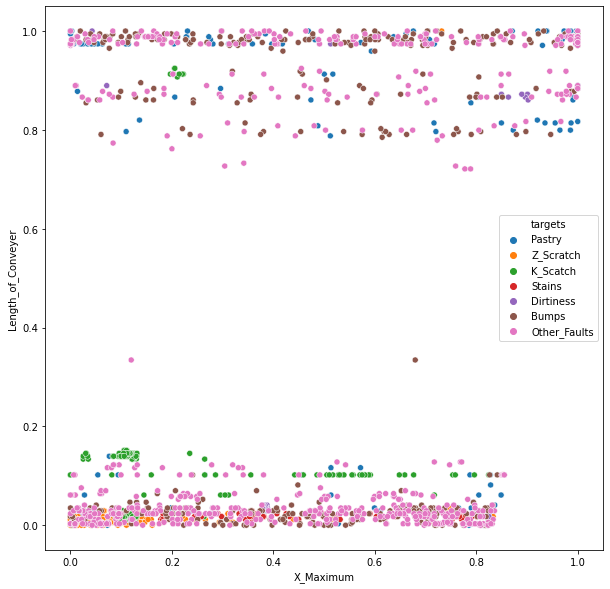

In [21]:
fig = plt.gcf()
fig.set_size_inches(10, 10)

sns.scatterplot(data = wdf_1, y = 'Length_of_Conveyer', x = 'X_Maximum', hue = 'targets')
plt.show()
#Looking at plots such as below proves that the classes are linearly non separable. Therefore, use Kernel PCA later on instead of PCA.

In [29]:
from sklearn.manifold import TSNE
tsne = TSNE(n_components = 2, init = 'pca', random_state = 0, perplexity = 30, early_exaggeration = 25, n_iter = 300, n_jobs = -1)
Tx = tsne.fit_transform(wdf_1[features_list].values)

D:\JupyterLab\resources\jlab_server\lib\site-packages\sklearn\manifold\_t_sne.py:805: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(
D:\JupyterLab\resources\jlab_server\lib\site-packages\sklearn\manifold\_t_sne.py:991: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  warnings.warn(


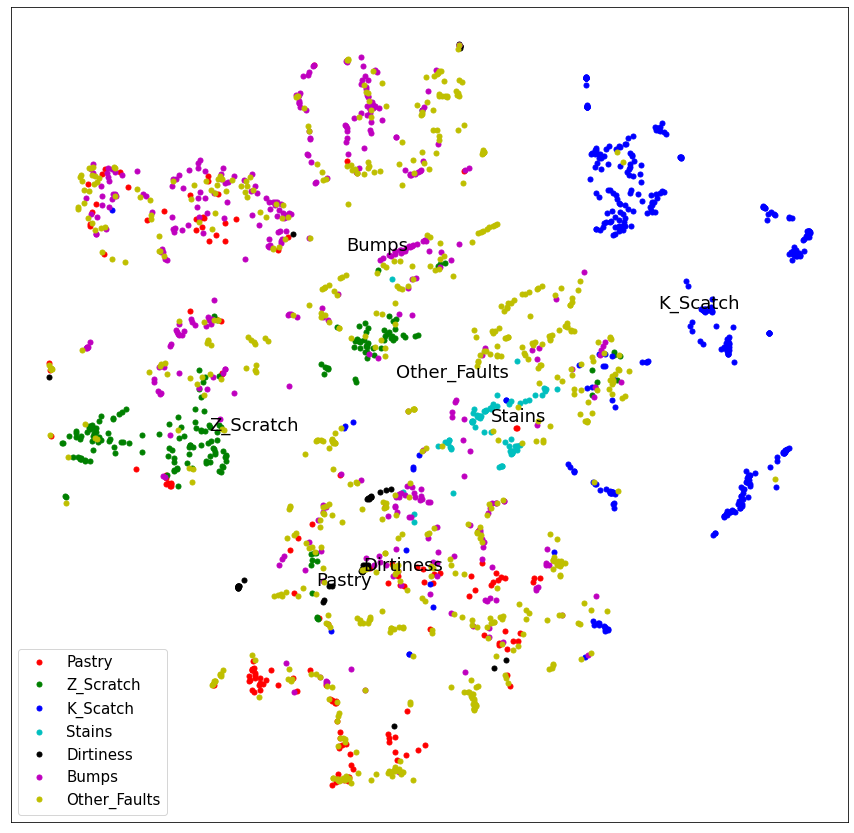

In [72]:
#K and Z scratch are the only ones that are easily distinguishable
colors = ['r','g','b','c', 'k', 'm', 'y']
plt.figure(figsize = (15, 15))
plt.xticks([], [])
plt.yticks([], [])

for color, target in zip(colors, label_list):
    selection = wdf_1['targets'].values == target
    X1, X2 = Tx[selection, 0], Tx[selection, 1]
    c1, c2 = np.median(X1), np.median(X2)
    plt.plot(X1, X2, 'o', ms = 5, color = color)
    plt.text(c1, c2, target, fontsize = 18)
plt.legend(label_list, prop = {'size': 15})

In [ ]:
no_of_comp_to_try = 11 #number of Kernel PCA components to try

In [18]:
#can't use n_jobs = -1 everywhere due to terminated worker error
def get_models():
    models = dict()
    for model_name, model in zip(initial_models_names, initial_models):
        for estimator_name, estimator in zip(estimator_names, estimators):
            rfecv = RFECV(estimator = estimator, cv = 5, scoring = 'accuracy', step = 1, n_jobs = -2)
            models[model_name + ' with estimator: ' + estimator_name] = Pipeline(steps = [('t', transformer), ('rfecv', rfecv), ('model', model)])
    return models


def get_models_kpca():
    models_kpca = dict()
    for model_name, model in zip(initial_models_names, initial_models):
        for no_of_components in range(1, no_of_comp_to_try + 1): 
            models_kpca[model_name + ' kPCA with ' + str(no_of_components) + ' components'] = Pipeline(steps = [('norm', MinMaxScaler()), ('kpca', KernelPCA(n_components = no_of_components, kernel = 'rbf', n_jobs = -2)), ('model_kpca', model)])
    return models_kpca


def evaluate_model(model, X, y):
    adjusted_y = np.argmax(y, axis=1) #adjust y_train so repeated stratified kfold can use it
    cv = RepeatedStratifiedKFold(n_splits = 5, n_repeats = 2, random_state = 1)
    scores = cross_val_score(model, X, adjusted_y, scoring = 'accuracy', cv = cv, n_jobs = None)
    return scores

In [201]:
#Filtering out highly correlated features using the code below barely affected the rfecv results. I ran the code that follows the plot below with and without filtering and the code
#without filtering almost always performed better, albeit slightly. so, I'll choose better performance over speed and will not filter out highly correlated features in the code following
#the plot below.
omit = [0,3,5,6,7,9,21,22,23,25]
s1 = set(list(range(0,27)))
s2 = set(omit)
include = list(s1.difference(s2))

feature_names = df_no_outliers.columns[:-7].values
wX_train = transformer.fit_transform(X_train)


selector = RFECV(estimator = RandomForestClassifier(), cv = 5, scoring = 'accuracy', n_jobs = -1)
selector.fit(wX_train[:,include], y_train)
print('--------Selected features by Random Forest Estimator--------')
print('Optimal number of features: %d' %selector.n_features_) #print the number of selected features
print(feature_names[include][selector.support_]) #print the selected features by RFECV
selector.ranking_

--------Selected features by Random Forest Estimator--------
Optimal number of features: 17
['X_Maximum' 'Y_Minimum' 'Pixels_Areas' 'Minimum_of_Luminosity'
 'Length_of_Conveyer' 'TypeOfSteel_A300' 'TypeOfSteel_A400'
 'Steel_Plate_Thickness' 'Edges_Index' 'Empty_Index' 'Square_Index'
 'Outside_X_Index' 'Edges_X_Index' 'Edges_Y_Index' 'Outside_Global_Index'
 'Orientation_Index' 'SigmoidOfAreas']


array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

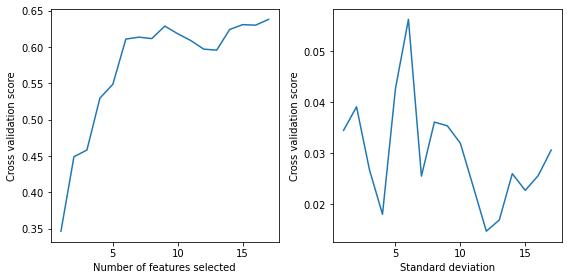

In [202]:
plt.figure(figsize = (8,4))
plt.subplot(1,2,1)
plt.plot(range(1, len(selector.cv_results_['mean_test_score'])+1), selector.cv_results_['mean_test_score'])
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score")
plt.subplot(1,2,2)
plt.plot(range(1, len(selector.cv_results_['mean_test_score'])+1), selector.cv_results_['std_test_score'])
plt.xlabel("Standard deviation")
plt.ylabel("Cross validation score")
plt.tight_layout()
plt.show()

In [203]:
selector.cv_results_['mean_test_score']

array([0.34636854, 0.44883396, 0.45803772, 0.52942102, 0.54859353,
       0.61071842, 0.61333902, 0.61137412, 0.6285861 , 0.61800756,
       0.60873604, 0.59684392, 0.59552598, 0.62395253, 0.63055974,
       0.62988875, 0.63782703])

In [ ]:
models = dict(get_models(), **get_models_kpca())
result_df = pd.DataFrame(columns = ['Model name', 'Mean scores',
                                    'Std of scores'])


for name, model in models.items():
    scores = evaluate_model(model, X_train, y_train)
    dic_append = {'Model name': name, 'Mean scores': np.mean(scores), 'Std of scores': np.std(scores)}
    result_df = result_df.append(dic_append, ignore_index = True)

In [213]:
result_df

,Model name,Mean scores,Std of scores
0,SVM with estimator: RF,0.734313,0.021949
1,ET with estimator: RF,0.628577,0.020569
2,DT with estimator: RF,0.671512,0.027159
3,LR with estimator: RF,0.706534,0.018850
4,KNN with estimator: RF,0.699622,0.020379
...,...,...,...
91,XGB kPCA with 7 components,0.705895,0.022934
92,XGB kPCA with 8 components,0.712819,0.020104
93,XGB kPCA with 9 components,0.715790,0.025778
94,XGB kPCA with 10 components,0.733314,0.011762


In [35]:
results = pd.read_pickle('algorithm_results.pkl')

In [18]:
results.sort_values(by = 'Mean scores', ascending = False).head(15)

,Model name,Mean scores,Std of scores
7,XGB with estimator: RF,0.756781,0.013767
6,SGB with estimator: RF,0.755808,0.026997
73,RF kPCA with 11 components,0.748533,0.018452
5,RF with estimator: RF,0.745548,0.027439
95,XGB kPCA with 11 components,0.745230,0.021285
72,RF kPCA with 10 components,0.740256,0.006909
0,SVM with estimator: RF,0.734313,0.021949
94,XGB kPCA with 10 components,0.733314,0.011762
18,SVM kPCA with 11 components,0.730340,0.017134
84,SGB kPCA with 11 components,0.729357,0.022198


In [14]:
print(results.to_string())

                     Model name  Mean scores  Std of scores
0        SVM with estimator: RF     0.734313       0.021949
1         ET with estimator: RF     0.628577       0.020569
2         DT with estimator: RF     0.671512       0.027159
3         LR with estimator: RF     0.706534       0.018850
4        KNN with estimator: RF     0.699622       0.020379
5         RF with estimator: RF     0.745548       0.027439
6        SGB with estimator: RF     0.755808       0.026997
7        XGB with estimator: RF     0.756781       0.013767
8    SVM kPCA with 1 components     0.525783       0.020851
9    SVM kPCA with 2 components     0.557514       0.036520
10   SVM kPCA with 3 components     0.604425       0.030640
11   SVM kPCA with 4 components     0.646396       0.024251
12   SVM kPCA with 5 components     0.653661       0.026181
13   SVM kPCA with 6 components     0.683411       0.019181
14   SVM kPCA with 7 components     0.698613       0.025892
15   SVM kPCA with 8 components     0.70

### IMBALANCED DATA ANALYSIS

In [39]:
#check data imbalance
from collections import Counter
counter = Counter(wdf_1['targets'].values)
for k,v in counter.items():
    per = v / len(y) * 100
    print('Class = %s, n = %d (%.3f%%)' % (k, v, per))

Class = Pastry, n = 156 (8.245%)
Class = Z_Scratch, n = 188 (9.937%)
Class = K_Scatch, n = 359 (18.975%)
Class = Stains, n = 72 (3.805%)
Class = Dirtiness, n = 55 (2.907%)
Class = Bumps, n = 400 (21.142%)
Class = Other_Faults, n = 662 (34.989%)


In [122]:
from imblearn.over_sampling import SMOTE, BorderlineSMOTE, ADASYN
from imblearn.under_sampling import CondensedNearestNeighbour, TomekLinks, OneSidedSelection
from imblearn.combine import SMOTETomek, SMOTEENN
from sklearn.utils.class_weight import compute_class_weight
from imblearn.ensemble import BalancedRandomForestClassifier, EasyEnsembleClassifier
from imblearn.pipeline import Pipeline
 
#Initially eliminated standard algorithms may perform good on the under/oversampled dataset but due to time constraint I won't do this.

In [123]:
best_models_names = ['SVM with estimator: RF', 'SGB with estimator: RF', 'XGB with estimator: RF', 'RF kpca with 10 comp', 'KNN kpca with 11 comp']

sampling_step = [('s1', SMOTE(n_jobs = -2)), 
                 ('s2', BorderlineSMOTE(n_jobs = -2)), 
                 ('s3', ADASYN(n_jobs = -2)), 
                 ('s4', CondensedNearestNeighbour(n_jobs = -2)), 
                 ('s5', TomekLinks(n_jobs = -2)), 
                 ('s6', OneSidedSelection(n_jobs = -2)), 
                 ('s7', SMOTETomek(n_jobs = -2)), 
                 ('s8', SMOTEENN(n_jobs = -2))]

sampling_names = ['smote', 'borderline smote', 'adasyn', 'cnn', 'tomek links', 'oss', 'smotetomek', 'smoteenn']

rfecv = RFECV(estimator = RandomForestClassifier(), cv = 5, scoring = 'accuracy', step = 1, n_jobs = -2)

best_models_steps = [[('t', transformer), ('rfecv', rfecv), ('model', SVC(kernel = 'rbf'))], 
               [('t', transformer), ('rfecv', rfecv), ('model', GradientBoostingClassifier())], 
               [('t', transformer), ('rfecv', rfecv), ('model', XGBClassifier(use_label_encoder = False, n_jobs = -2))], 
               [('norm', MinMaxScaler()), ('kpca', KernelPCA(n_components = 10, kernel = 'rbf', n_jobs = -2)), ('model', RandomForestClassifier(n_jobs = -2))], 
               [('norm', MinMaxScaler()), ('kpca', KernelPCA(n_components = 11, kernel = 'rbf', n_jobs = -2)), ('model', KNeighborsClassifier(n_jobs = -2))]]

#replace y_train elements with labels to be used in compute_class_weight which will be used in XGBClassifier 
adjusted_y_train = np.argmax(y_train, axis=1)
adjusted_y_train = adjusted_y_train.astype('str')
adjusted_y_train[adjusted_y_train == '0'] = 'Pastry'
adjusted_y_train[adjusted_y_train == '1'] = 'Z_Scratch'
adjusted_y_train[adjusted_y_train == '2'] = 'K_Scatch'
adjusted_y_train[adjusted_y_train == '3'] = 'Stains'
adjusted_y_train[adjusted_y_train == '4'] = 'Dirtiness'
adjusted_y_train[adjusted_y_train == '5'] = 'Bumps'
adjusted_y_train[adjusted_y_train == '6'] = 'Other_Faults'
weighting = compute_class_weight(class_weight = 'balanced', classes = list(label_list), y = adjusted_y_train)

#cs = cost-sensitive
cs_model_steps = [[('t', transformer), ('rfecv', rfecv), ('model', SVC(kernel = 'rbf', class_weight = 'balanced'))], 
               [('t', transformer), ('rfecv', rfecv), ('model', LogisticRegression(class_weight = 'balanced', n_jobs = -2))], 
               [('t', transformer), ('rfecv', rfecv), ('model', XGBClassifier(scale_pos_weight = weighting, use_label_encoder = False, n_jobs = -2))], #check if scale pos weight will work with a list input
               [('norm', MinMaxScaler()), ('kpca', KernelPCA(n_components = 10, kernel = 'rbf', n_jobs = -2)), ('model', RandomForestClassifier(class_weight = 'balanced', n_jobs = -2))], 
               [('norm', MinMaxScaler()), ('kpca', KernelPCA(n_components = 10, kernel = 'rbf', n_jobs = -2)), ('model', RandomForestClassifier(class_weight = 'balanced_subsample', n_jobs = -2))],
               [('norm', MinMaxScaler()), ('kpca', KernelPCA(n_components = 10, kernel = 'rbf', n_jobs = -2)), ('model', BalancedRandomForestClassifier(n_jobs = -2))],
               [('norm', MinMaxScaler()), ('kpca', KernelPCA(n_components = 10, kernel = 'rbf', n_jobs = -2)), ('model', EasyEnsembleClassifier( n_jobs = -2))]]

                  
cs_model_names = ['cs SVC', 'cs LR', 'cs XGB', 'cs RF', 'cs RF subsample', 'cs Balanced RF', 'cs EEC']

def get_models_sampling():
    best_models = dict()
    for sname, sampling in zip(sampling_names, sampling_step):
        for name, steps in zip(best_models_names, best_models_steps):
            q = steps.copy()
            q.insert(1, sampling)
            best_models[name + ' and ' + sname] = Pipeline(steps = q)
    return best_models

def get_cost_sensitive_models():
    cost_sensitive_models = dict()
    for name, step in zip(cs_model_names, cs_model_steps):
        cost_sensitive_models[name] = Pipeline(steps = step)
    return cost_sensitive_models           

In [ ]:
models_1 = dict(get_models_sampling(), **get_cost_sensitive_models())
result_1_df = pd.DataFrame(columns = ['Model name', 'Mean scores',
                                    'Std of scores'])


for name, model in models_1.items():
    scores = evaluate_model(model, X_train, y_train)
    dic_append = {'Model name': name, 'Mean scores': np.mean(scores), 'Std of scores': np.std(scores)}
    result_1_df = result_1_df.append(dic_append, ignore_index = True)

In [42]:
result_1_df

,Model name,Mean scores,Std of scores
0,SVM with estimator: RF and smote,0.722076,0.017383
1,SGB with estimator: RF and smote,0.759431,0.020934
2,XGB with estimator: RF and smote,0.762409,0.023622
3,RF kpca with 10 comp and smote,0.723745,0.030920
4,KNN kpca with 11 comp and smote,0.701261,0.018728
5,SVM with estimator: RF and borderline smote,0.712494,0.016149
6,SGB with estimator: RF and borderline smote,0.752493,0.014874
7,XGB with estimator: RF and borderline smote,0.770021,0.025405
8,RF kpca with 10 comp and borderline smote,0.740275,0.026480
9,KNN kpca with 11 comp and borderline smote,0.695652,0.015387


In [32]:
result_1_df.sort_values(by = 'Mean scores', ascending = False)

,Model name,Mean scores,Std of scores
12,XGB with estimator: RF and adasyn,0.771324,0.021042
7,XGB with estimator: RF and borderline smote,0.770021,0.025405
42,cs XGB,0.765704,0.018169
22,XGB with estimator: RF and tomek links,0.764378,0.027498
11,SGB with estimator: RF and adasyn,0.764058,0.023788
2,XGB with estimator: RF and smote,0.762409,0.023622
1,SGB with estimator: RF and smote,0.759431,0.020934
32,XGB with estimator: RF and smotetomek,0.759103,0.031761
21,SGB with estimator: RF and tomek links,0.754142,0.023131
31,SGB with estimator: RF and smotetomek,0.753162,0.022113


In [22]:
result_1_df.to_pickle('algorithm_results_1.pkl')
#results_1 = pd.read_pickle('algorithm_results_1.pkl')

In [45]:
concat = pd.concat([results, result_1_df])
print(concat.sort_values(by = 'Mean scores', ascending = False).to_string())

                                     Model name  Mean scores  Std of scores
12            XGB with estimator: RF and adasyn     0.771324       0.021042
7   XGB with estimator: RF and borderline smote     0.770021       0.025405
42                                       cs XGB     0.765704       0.018169
22       XGB with estimator: RF and tomek links     0.764378       0.027498
11            SGB with estimator: RF and adasyn     0.764058       0.023788
2              XGB with estimator: RF and smote     0.762409       0.023622
1              SGB with estimator: RF and smote     0.759431       0.020934
32        XGB with estimator: RF and smotetomek     0.759103       0.031761
7                        XGB with estimator: RF     0.756781       0.013767
6                        SGB with estimator: RF     0.755808       0.026997
21       SGB with estimator: RF and tomek links     0.754142       0.023131
31        SGB with estimator: RF and smotetomek     0.753162       0.022113
6   SGB with

In [108]:
np.argmax(y_train, axis=1)

array([5, 1, 2, ..., 4, 5, 2], dtype=int64)

In [155]:
#based on the above results, I'll tune 'XGB with estimator: RF and adasyn'
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV

best_model = Pipeline(steps = [('t', transformer), ('samp', ADASYN(n_jobs = -2)), ('model', XGBClassifier(use_label_encoder = False, n_jobs = -2))]) #initially wanted to use rfecv as well but kept on receiving AttributeError: 'list' object has no attribute 'take'
grid = {'model__n_estimators': range(1,80), 'samp__n_neighbors': range(1,30)}

random_search = RandomizedSearchCV(estimator = best_model, param_distributions = grid, refit = False, n_iter = 120, scoring = 'accuracy', cv = 5, n_jobs = -2)
random_search.fit(X_train, np.argmax(y_train, axis=1))
# CORRECTION: SHOULD'VE DONE TRAIN,TEST, AND VALIDATION SPLIT AND USED THE VALIDATION SET HERE.

[17:43:26] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('t', PowerTransformer()),
                                             ('samp', ADASYN(n_jobs=-2)),
                                             ('model',
                                              XGBClassifier(base_score=None,
                                                            booster=None,
                                                            colsample_bylevel=None,
                                                            colsample_bynode=None,
                                                            colsample_bytree=None,
                                                            enable_categorical=False,
                                                            gamma=None,
                                                            gpu_id=None,
                                                            importance_type=None,
                                                            interaction_constraints=None,
                                                            learning_rate=None,
                                                            max_delta_st...
                                                            n_estimators=100,
                                                            n_jobs=-2,
                                                            num_parallel_tree=None,
                                                            predictor=None,
                                                            random_state=None,
                                                            reg_alpha=None,
                                                            reg_lambda=None,
                                                            scale_pos_weight=None,
                                                            subsample=None,
                                                            tree_method=None,
                                                            use_label_encoder=False,
                                                            validate_parameters=None,
                                                            verbosity=None))]),
                   n_iter=120, n_jobs=-2,
                   param_distributions={'model__n_estimators': range(1, 80),
                                        'samp__n_neighbors': range(1, 30)},
                   scoring='accuracy')

In [156]:
random_search.best_score_

0.8057089152623872

In [157]:
random_search.best_params_

{'samp__n_neighbors': 6, 'model__n_estimators': 28}

In [160]:
#use best parameters on the validation set
test_score = random_search.score(X_validation, np.argmax(y_validation, axis = 1)) 
# CORRECTION: SHOULD'VE USED THE BEST HYPERPARAMETERS TO TRAIN ON THE FULL TRAINING DATASET INSTEAD OF USING .SCORE, THEN USE THE TEST 
# SET TO OBTAIN THE FINAL PERFORMANCE!
print('Test accuracy score: %0.3f' % test_score)

Test accuracy score: 0.770


### SAVE MODEL and FEATURE TRANSFORMATIONS

In [161]:
from pickle import dump

dump(best_model, open('best_model.pkl', 'wb'))
dump(transformer, open('transformer.pkl', 'wb'))

In [ ]:
transformer = PowerTransformer(method = 'yeo-johnson', standardize = True)
